In [2]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [3]:
type(countries)


geopandas.geodataframe.GeoDataFrame

In [4]:
countries.shape

(252, 2)

In [5]:
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [6]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

In [7]:
rivers.shape

(98, 3)

In [8]:
cities.shape

(610, 4)

In [9]:
india=countries[countries.COUNTRY=='India']

<Axes: >

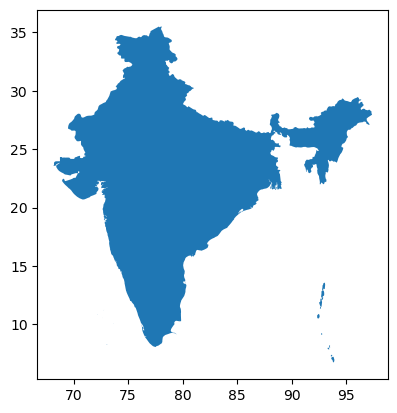

In [10]:
#Elegimos un pais para observar su mapa en este caso de la India
india.plot()

<Axes: >

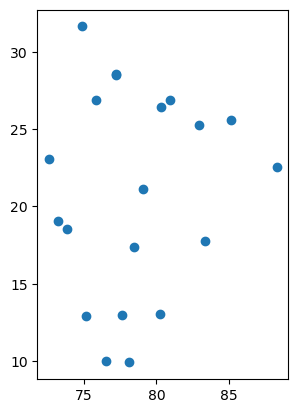

In [11]:
cities_india=cities[cities.COUNTRY=='India']
# Para observar las cuidades de India 
cities_india.plot()

In [12]:
cities_india.head()

,NAME,COUNTRY,CAPITAL,geometry
172,Amritsar,India,N,POINT (74.87155 31.63089)
187,New Delhi,India,Y,POINT (77.21675 28.56873)
188,Delhi,India,N,POINT (77.22437 28.52646)
192,Jaipur,India,N,POINT (75.80128 26.90511)
193,Lucknow,India,N,POINT (80.91972 26.84943)


<Axes: >

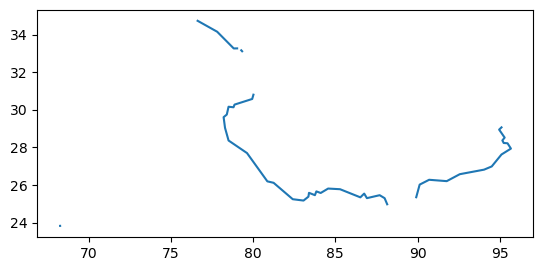

In [13]:
#Para observar los rios de la cuidad de India
rivers_india = gpd.clip(gdf=rivers,
                               mask=india)
rivers_india.plot()

In [14]:
rivers_india.head()

,NAME,SYSTEM,geometry
21,Ganges,None,"LINESTRING (80.02996 30.85733, 79.93790 30.576..."
9,Brahmaputra,None,"LINESTRING (95.15938 29.10762, 94.96929 28.949..."
26,Indus,None,"MULTILINESTRING ((68.25066 23.78104, 68.23929 ..."


<Axes: >

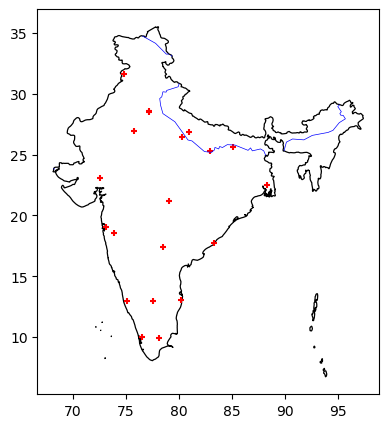

In [15]:
#Crear mapa para observar
base = india.plot(facecolor="white", edgecolor='black', linewidth=0.9,figsize=(5,5))
cities_india.plot(marker='+', color='red', markersize=20,ax=base)
rivers_india.plot(edgecolor='blue', linewidth=0.5,ax=base)

In [16]:
indiaCoord = [20.593684, 78.96288]

In [17]:
m = cities_india.explore(location=indiaCoord,
                   zoom_start=4,
                   tiles='CartoDB positron',
                   color='red',
                   name="cities") #optional
m = rivers_india.explore(m=m, color="blue",
                   name="rivers")
m

In [18]:
india.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [19]:
india.centroid

C:\Users\user\AppData\Local\Temp\ipykernel_26152\2394425128.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  india.centroid


104    POINT (79.61623 22.88360)
dtype: geometry

In [20]:
india.to_crs(24383).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [21]:
india.to_crs(24383).centroid

104    POINT (2701130.472 2134834.616)
dtype: geometry

<Axes: >

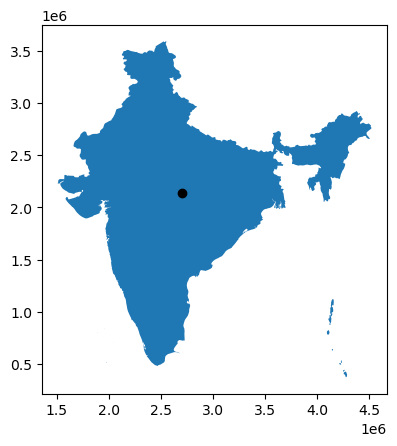

In [22]:
base24378=india.to_crs(24383).plot()
india.to_crs(24383).centroid.plot(color='Black',ax=base24378)

In [23]:
india_24383=india.to_crs(24383)
cities_india=cities[cities.COUNTRY=='India']
cities_24383=cities_india.to_crs(india_24383.crs)
rivers_24383=rivers.to_crs(india_24383.crs)
rivers_24383=gpd.clip(gdf=rivers_24383,mask=india_24383)

<Axes: >

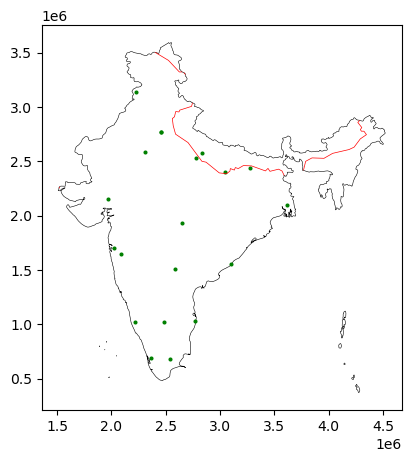

In [24]:
base = india_24383.plot(facecolor="white", edgecolor='black', linewidth=0.4,figsize=(5,5))
cities_24383.plot(marker='.', color='green', markersize=15,ax=base)
rivers_24383.plot(edgecolor='red', linewidth=0.5,ax=base)

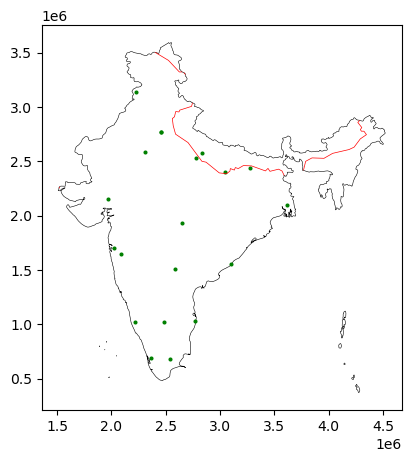

In [25]:
import matplotlib.pyplot as plt
baseindia = india_24383.plot(facecolor="white", edgecolor='black', linewidth=0.4,figsize=(5,5))
map2=cities_24383.plot(marker='.', color='green', markersize=15,ax=baseindia)
mapEndindia=rivers_24383.plot(edgecolor='red', linewidth=0.5,ax=baseindia)
plt.savefig(os.path.join("Figures",'mapEnd.jpg'))

In [26]:
countries.to_file(os.path.join("maps","worldmaps.gpkg"), layer='countries', driver="GPKG")
cities.to_file(os.path.join("maps","worldmaps.gpkg"), layer='cities', driver="GPKG")
rivers.to_file(os.path.join("maps","worldmaps.gpkg"), layer='rivers', driver="GPKG")

In [27]:
worldmaps='https://github.com/gokussj100/simpleplot/raw/main/maps/worldmaps.gpkg'

In [28]:
from  fiona import listlayers
listlayers(worldmaps)

['countries', 'cities', 'rivers']

In [ ]:
countries2=gpd.read_file(worldmaps,layer='countries')
cities2=gpd.read_file(worldmaps,layer='cities')
rivers2=gpd.read_file(worldmaps,layer='rivers')

In [ ]:
base2= countries.plot(facecolor='gainsboro')
cities2.plot(ax=base2, markersize=0.5, color='green') 
rivers2.plot(ax=base2, linewidth=0.5)

In [41]:
import os 
india_24383.to_file(os.path.join("maps","india_24383","indiaMaps_24383.gpkg"), layer='country', driver="GPKG")
cities_24383.to_file(os.path.join("maps","india_24383","indiaMaps_24383.gpkg"), layer='cities', driver="GPKG")
rivers_24383.to_file(os.path.join("maps","india_24383","indiaMaps_24383.gpkg"), layer='rivers', driver="GPKG")

In [43]:
#Verificando si el link de indiaMaps esta correcto
indiaMaps='https://github.com/gokussj100/simpleplot/raw/main/maps/india_24383/indiaMaps_24383.gpkg'
indiaMaps

'https://github.com/gokussj100/simpleplot/raw/main/maps/india_24383/indiaMaps_24383.gpkg'

In [44]:
listlayers(indiaMaps)

['country', 'cities', 'rivers']

In [47]:
countries=gpd.read_file(indiaMaps,layer='country')
cities=gpd.read_file(indiaMaps,layer='cities')
rivers=gpd.read_file(indiaMaps,layer='rivers')

<Axes: >

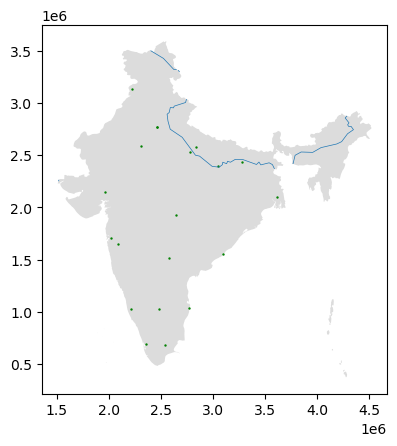

In [48]:
base= countries.plot(facecolor='gainsboro')
cities.plot(ax=base, markersize=0.5, color='green') 
rivers.plot(ax=base, linewidth=0.5)

In [49]:
#Terminado
#Sebastian Quintana 20211904